In [1]:
import pandas as pd
import numpy as sns
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import statsmodels.formula.api as smf


import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('NewspaperData.csv')

In [3]:
data.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [4]:
data.shape

(34, 3)

In [5]:
data1=data.drop(['Newspaper'],axis=1)
data1

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093
5,733.775,1133.249
6,198.832,348.744
7,252.624,417.779
8,206.204,344.522
9,231.177,323.084


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


In [7]:
data.isna().sum()

Newspaper    0
daily        0
sunday       0
dtype: int64

In [8]:
data.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


In [9]:
data1.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


<AxesSubplot:xlabel='daily', ylabel='Density'>

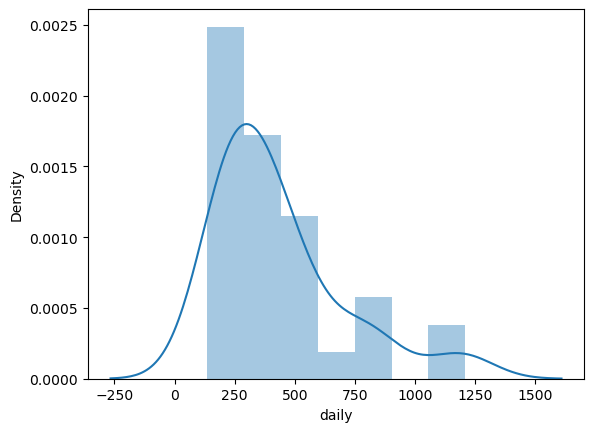

In [10]:
import seaborn as sns
sns.distplot(data['daily'])

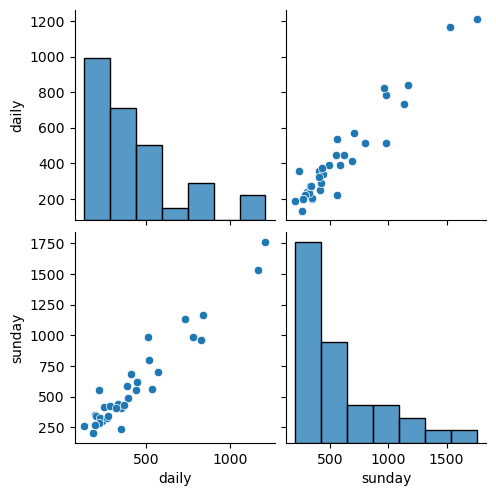

In [11]:
sns.pairplot(data)
plt.show()

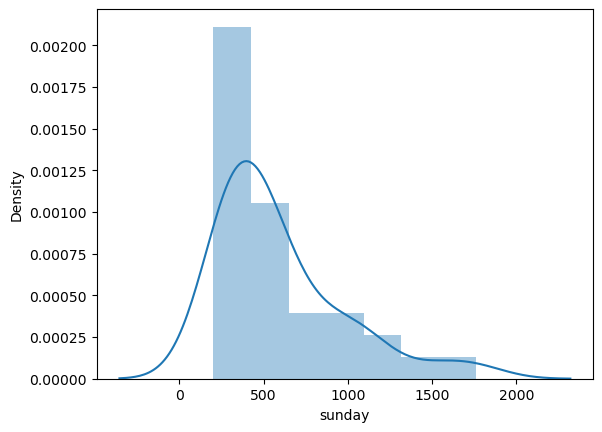

In [12]:
sns.distplot(data['sunday'])
plt.show()

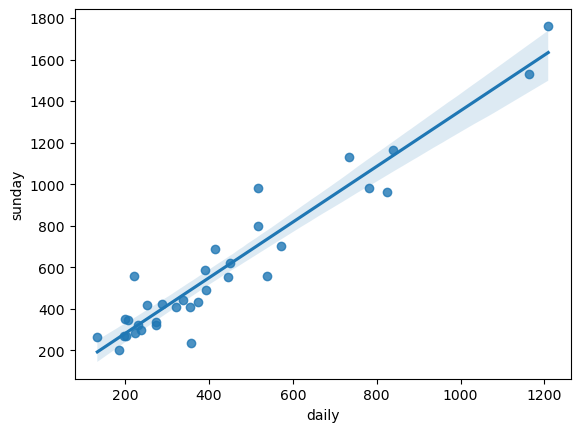

In [13]:
sns.regplot(x='daily',y='sunday',data=data)
plt.show()

In [14]:
import statsmodels.formula.api as smf
model = smf.ols('sunday~daily',data=data).fit()

In [15]:
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [16]:
print(model.rsquared,model.rsquared_adj)

0.9180596895873294 0.9154990548869335


In [17]:
(model.tvalues, '\n',model.pvalues)

(Intercept     0.386427
 daily        18.934840
 dtype: float64,
 '\n',
 Intercept    7.017382e-01
 daily        6.016802e-19
 dtype: float64)

### Predict for new data point

In [18]:
#Predict for 200 and 300 daily circulation
newdata=pd.Series([200,300])

In [19]:
data_pred=pd.DataFrame(newdata,columns=['daily'])

In [20]:
model.predict(data_pred)

0    281.778581
1    415.750057
dtype: float64

## PROBLEM-02

In [21]:
data = pd.read_csv('WC_AT.csv')

In [22]:
data.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


In [24]:
data.shape

(109, 2)

In [25]:
data.isnull().sum()

Waist    0
AT       0
dtype: int64

In [26]:
data.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


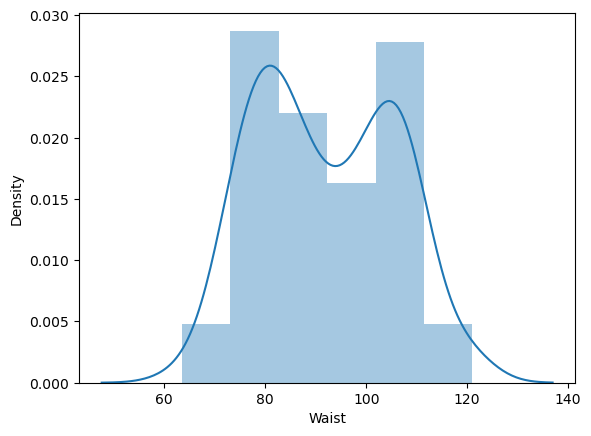

In [27]:
import seaborn as sns
sns.distplot(data['Waist'])
plt.show()

In [28]:
data.describe()

,Waist,AT
count,109.000000,109.000000
mean,91.901835,101.894037
std,13.559116,57.294763
min,63.500000,11.440000
25%,80.000000,50.880000
50%,90.800000,96.540000
75%,104.000000,137.000000
max,121.000000,253.000000


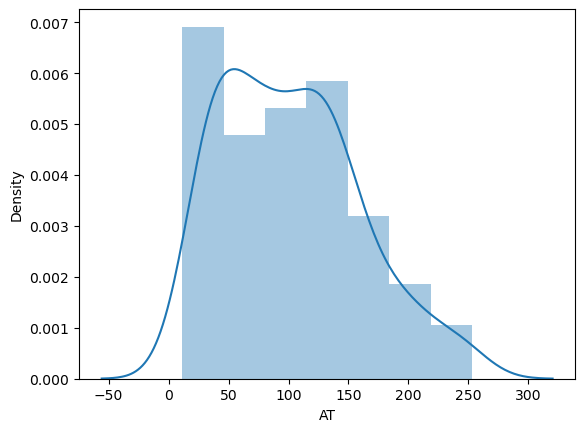

In [29]:
sns.distplot(data['AT'])
plt.show()

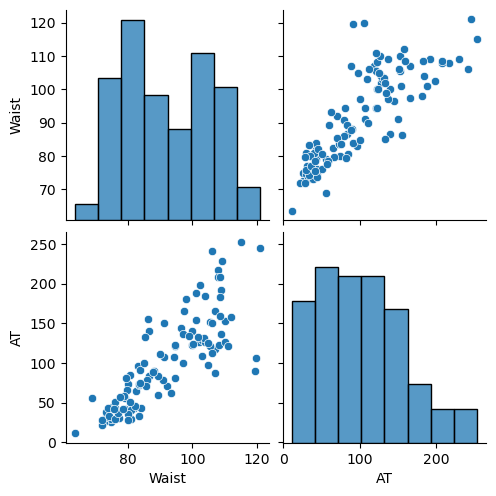

In [30]:
sns.pairplot(data)
plt.show()

In [31]:
import statsmodels.formula.api as smf
model =smf.ols('AT~Waist',data=data).fit()

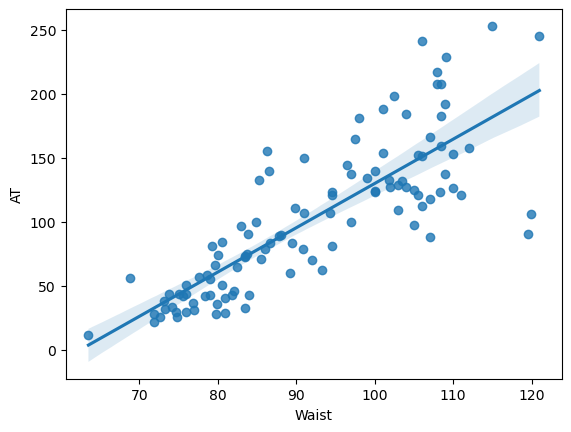

In [32]:
sns.regplot(x='Waist',y='AT',data=data);

In [33]:
model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [34]:
(model.pvalues,'\n',model.tvalues)

(Intercept    8.197416e-17
 Waist        1.618607e-27
 dtype: float64,
 '\n',
 Intercept    -9.909103
 Waist        14.740376
 dtype: float64)

In [35]:
print(model.pvalues,'\n',model.tvalues)

Intercept    8.197416e-17
Waist        1.618607e-27
dtype: float64 
 Intercept    -9.909103
Waist        14.740376
dtype: float64


In [36]:
print(model.rsquared,model.rsquared_adj)

0.6700368930528429 0.6669531256981966
